In [1]:
!pip install wordcloud

You should consider upgrading via the 'c:\users\rkrk4\anaconda3\python.exe -m pip install --upgrade pip' command.


In [2]:
import pandas as pd
import glob
import re
from functools import reduce
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import STOPWORDS, WordCloud

In [3]:
all_files = glob.glob('./myCabinetExcelData*.xls')
all_files

['.\\myCabinetExcelData (1).xls',
 '.\\myCabinetExcelData (2).xls',
 '.\\myCabinetExcelData (3).xls',
 '.\\myCabinetExcelData (4).xls',
 '.\\myCabinetExcelData (5).xls',
 '.\\myCabinetExcelData (6).xls',
 '.\\myCabinetExcelData (7).xls',
 '.\\myCabinetExcelData (8).xls',
 '.\\myCabinetExcelData (9).xls',
 '.\\myCabinetExcelData.xls']

In [4]:
all_files_data = []
for file in all_files:
    data_fram = pd.read_excel(file)
    all_files_data.append(data_fram)

In [5]:
all_files_data[0]

,Unnamed: 0,번호,제목,저자,출판사,출판일
0,NaN,1,Improved big data stock index prediction using...,"Eapen, Jithin; Verma, Abhishek; Bein, Doina",Inderscience,2021
1,NaN,2,Health big data analytics: current perspective...,"Kuo, Mu-Hsing; Sahama, Tony; Kushniruk, Andre ...",Inderscience,2014
2,NaN,3,Agile Big Data Analytics for Web-Based Systems...,"Chen, H.; Kazman, R.; Haziyev, S.",unknown,2016
3,NaN,4,Guest Editorial: Big Data Analytics and the Web,"Sheng, M.; Vasilakos, A. V.; Yu, Q.; You, L.",unknown,2016
4,NaN,5,Guest Editorial: Big Data Infrastructure I,"Chen, J.; Wang, H.",unknown,2018
...,...,...,...,...,...,...
95,NaN,96,A Detailed Review on the Prominent Compression...,"Anuradha, D.; Bhuvaneswari, S.",Springer Science + Business Media,2016
96,NaN,97,Divide and recombine (D&R) data science projec...,"Tung, Wen-wen; Barthur, Ashrith; Bowers, Matth...",Springer Nature,2018
97,NaN,98,An overview of online based platforms for shar...,"Chen, Yang; Wang, Zhong‐yi; Yuan, Gang; Huang,...",John Wiley & Sons Ltd,2017
98,NaN,99,A Survey on Data Collection for Machine Learni...,"Roh, Yuji; Heo, Geon; Whang, Steven Euijong",IEEE INSTITUTE OF ELECTRICAL AND ELECTRONICS,2021


In [6]:
all_files_data_concat = pd.concat(all_files_data, axis=0, ignore_index=True)

In [7]:
all_files_data_concat

,Unnamed: 0,번호,제목,저자,출판사,출판일
0,NaN,1,Improved big data stock index prediction using...,"Eapen, Jithin; Verma, Abhishek; Bein, Doina",Inderscience,2021
1,NaN,2,Health big data analytics: current perspective...,"Kuo, Mu-Hsing; Sahama, Tony; Kushniruk, Andre ...",Inderscience,2014
2,NaN,3,Agile Big Data Analytics for Web-Based Systems...,"Chen, H.; Kazman, R.; Haziyev, S.",unknown,2016
3,NaN,4,Guest Editorial: Big Data Analytics and the Web,"Sheng, M.; Vasilakos, A. V.; Yu, Q.; You, L.",unknown,2016
4,NaN,5,Guest Editorial: Big Data Infrastructure I,"Chen, J.; Wang, H.",unknown,2018
...,...,...,...,...,...,...
995,NaN,96,Intelligent big data analysis: a review,"Tsai, Chun-Wei; Yang, Ya-Lan; Chiang, Ming-Cha...",Inderscience,2014
996,NaN,97,Analyzing Big Smart Metering Data Towards Diff...,"Pan, E.; Wang, D.; Han, Z.",unknown,2016
997,NaN,98,Scalable big data modelling,"Patel, Jayesh",Inderscience,2021
998,NaN,99,A big data analytics framework for border cros...,"Wang, Haibo; Huo, Da; Xu, Yaquan",Inderscience,2017


In [8]:
all_files_data_concat.to_csv('./riss_bigdata.csv', encoding='utf-8', index=False)

### 데이터 전처리

In [9]:
all_title = all_files_data_concat['제목']
all_title

0      Improved big data stock index prediction using...
1      Health big data analytics: current perspective...
2      Agile Big Data Analytics for Web-Based Systems...
3        Guest Editorial: Big Data Analytics and the Web
4             Guest Editorial: Big Data Infrastructure I
                             ...                        
995              Intelligent big data analysis: a review
996    Analyzing Big Smart Metering Data Towards Diff...
997                          Scalable big data modelling
998    A big data analytics framework for border cros...
999          Clustering Big Spatiotemporal-Interval Data
Name: 제목, Length: 1000, dtype: object

In [10]:
stopWords = set(stopwords.words("english"))
lemma = WordNetLemmatizer()

In [11]:
words = []

for title in all_title:
    EnWords = re.sub(r"[^a-zA-Z]+"," ",str(title))
    EnWordsToken = word_tokenize(EnWords.lower())
    EnWordsTokenStop = [w for w in EnWordsToken if w not in stopWords]
    EnWordsTokenStopLemma = [lemma.lemmatize(w) for w in EnWordsTokenStop]
    words.append(EnWordsTokenStopLemma)

In [13]:
words

[['improved',
  'big',
  'data',
  'stock',
  'index',
  'prediction',
  'using',
  'deep',
  'learning',
  'cnn',
  'gru'],
 ['health',
  'big',
  'data',
  'analytics',
  'current',
  'perspective',
  'challenge',
  'potential',
  'solution'],
 ['agile',
  'big',
  'data',
  'analytics',
  'web',
  'based',
  'system',
  'architecture',
  'centric',
  'approach'],
 ['guest', 'editorial', 'big', 'data', 'analytics', 'web'],
 ['guest', 'editorial', 'big', 'data', 'infrastructure'],
 ['guest', 'editorial', 'big', 'data', 'analytics', 'web'],
 ['guest',
  'editorial',
  'big',
  'scholar',
  'data',
  'discovery',
  'collaboration'],
 ['guest',
  'editorial',
  'big',
  'scholar',
  'data',
  'discovery',
  'collaboration'],
 ['speed',
  'big',
  'data',
  'analytics',
  'unveiling',
  'storage',
  'distribution',
  'sub',
  'datasets'],
 ['resting',
  'state',
  'fmri',
  'functional',
  'connectivity',
  'big',
  'data',
  'preprocessing',
  'pipeline',
  'topological',
  'data',
  'an

In [14]:
words2 = list(reduce(lambda x,y:x+y,words))

In [15]:
words2

['improved',
 'big',
 'data',
 'stock',
 'index',
 'prediction',
 'using',
 'deep',
 'learning',
 'cnn',
 'gru',
 'health',
 'big',
 'data',
 'analytics',
 'current',
 'perspective',
 'challenge',
 'potential',
 'solution',
 'agile',
 'big',
 'data',
 'analytics',
 'web',
 'based',
 'system',
 'architecture',
 'centric',
 'approach',
 'guest',
 'editorial',
 'big',
 'data',
 'analytics',
 'web',
 'guest',
 'editorial',
 'big',
 'data',
 'infrastructure',
 'guest',
 'editorial',
 'big',
 'data',
 'analytics',
 'web',
 'guest',
 'editorial',
 'big',
 'scholar',
 'data',
 'discovery',
 'collaboration',
 'guest',
 'editorial',
 'big',
 'scholar',
 'data',
 'discovery',
 'collaboration',
 'speed',
 'big',
 'data',
 'analytics',
 'unveiling',
 'storage',
 'distribution',
 'sub',
 'datasets',
 'resting',
 'state',
 'fmri',
 'functional',
 'connectivity',
 'big',
 'data',
 'preprocessing',
 'pipeline',
 'topological',
 'data',
 'analysis',
 'kvasir',
 'scalable',
 'provision',
 'semantically',

### 데이터 탐색 및 분석 모델 구축

In [16]:
count = Counter(words2)
count

Counter({'improved': 5,
         'big': 1121,
         'data': 1250,
         'stock': 4,
         'index': 6,
         'prediction': 19,
         'using': 60,
         'deep': 9,
         'learning': 42,
         'cnn': 1,
         'gru': 1,
         'health': 33,
         'analytics': 94,
         'current': 8,
         'perspective': 22,
         'challenge': 51,
         'potential': 10,
         'solution': 14,
         'agile': 1,
         'web': 10,
         'based': 87,
         'system': 49,
         'architecture': 10,
         'centric': 1,
         'approach': 51,
         'guest': 12,
         'editorial': 15,
         'infrastructure': 10,
         'scholar': 3,
         'discovery': 13,
         'collaboration': 6,
         'speed': 1,
         'unveiling': 1,
         'storage': 9,
         'distribution': 10,
         'sub': 1,
         'datasets': 2,
         'resting': 1,
         'state': 11,
         'fmri': 1,
         'functional': 1,
         'connectivity': 1,


In [17]:
word_count = dict()
for tag, counts in count.most_common(50):
    if(len(str(tag))>1):
        word_count[tag] = counts
        print("%s : %d" % (tag, counts))

data : 1250
big : 1121
analytics : 94
based : 87
analysis : 78
using : 60
driven : 57
challenge : 51
approach : 51
system : 49
model : 44
new : 43
learning : 42
science : 38
application : 36
health : 33
framework : 33
research : 33
management : 32
issue : 31
opportunity : 30
platform : 28
era : 28
technology : 27
information : 27
review : 26
smart : 26
cloud : 25
network : 25
processing : 24
algorithm : 24
social : 23
process : 23
perspective : 22
method : 22
earth : 22
mining : 22
real : 21
computing : 21
machine : 21
small : 21
use : 21
survey : 20
service : 20
business : 20
world : 20
energy : 20
prediction : 19
time : 19
distributed : 19


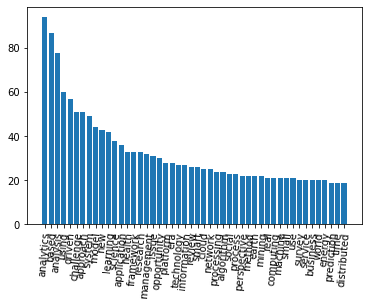

In [20]:
sorted_Keys = sorted(word_count, key=word_count.get, reverse=True)
sorted_Values = sorted(word_count.values(), reverse=True)
plt.bar(range(len(word_count)), sorted_Values, align='center')
plt.xticks(range(len(word_count)), list(sorted_Keys), rotation='85')
plt.show()

In [19]:
del word_count['big']
del word_count['data']

### 결과 시각화

In [21]:
all_files_data_concat['doc_count'] = 0
summary_year = all_files_data_concat.groupby('출판일', as_index=False)['doc_count'].count()

In [22]:
summary_year

,출판일,doc_count
0,1995,1
1,2003,1
2,2004,1
3,2006,1
4,2008,1
5,2009,1
6,2011,9
7,2012,19
8,2013,56
9,2014,157


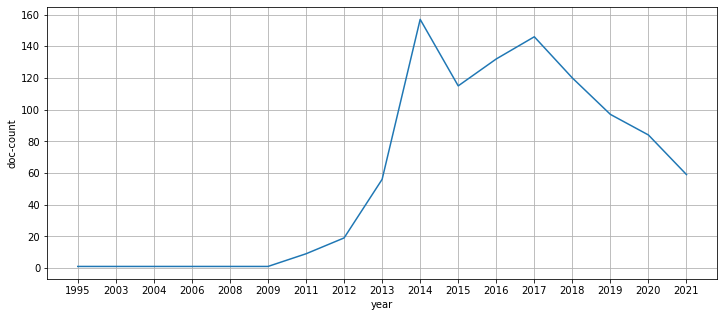

In [24]:
plt.figure(figsize=(12,5))
plt.xlabel("year")
plt.ylabel("doc-count")
plt.grid(True)
plt.plot(range(len(summary_year)), summary_year['doc_count'])
plt.xticks(range(len(summary_year)), [text for text in summary_year['출판일']])
plt.show()

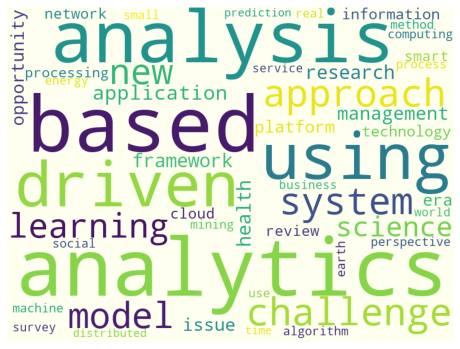

In [25]:
stopwords = set(STOPWORDS)
wc = WordCloud(background_color='ivory', stopwords=stopwords, width=800, height=600)
cloud = wc.generate_from_frequencies(word_count)
plt.figure(figsize=(8,8))
plt.imshow(cloud)
plt.axis('off')
plt.show()